## Appliances Energy Prediction Project

Contents


1.Goal of The Project

2.General View of Data

3.Data Cleaning

4.Feature Engineering

5.Exploring the Data

6.Building Models

7.Results

### 1.Goal of The Project

In this project, we will try to establish linear regression models to estimate the energy consumption of household appliances. Our target variable is the Appliances variable.

### 2.General View of Data

#### Variables :

In [1]:
# Let's start by importing the libraries we will use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
energy_df = pd.read_csv("KAG_energydata_complete.csv")
df = energy_df.copy()
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.shape

(19735, 29)

In [6]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### 3.Data Cleaning

In [8]:
#no missing data
df.isnull().sum().head()

date          0
Appliances    0
lights        0
T1            0
RH_1          0
dtype: int64

### 4.Feature Engineering

In [9]:
#I organized it this way because RH expresses percentages.

rh = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out"]
df[rh] = df[rh]/100

In [10]:
# I converted the temperature measurements from C to K to make the conversions comfortable.
t = ["T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out","Tdewpoint"]
df[t] = df[t] + 273.15

In [11]:
df["date"] = pd.to_datetime(df["date"])

In [12]:
df["year"] =df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week
# monday=0,sunday=6
df["weekday"] = df["date"].dt.weekday

df["day"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

In [13]:
title = {0:"Monday", 1:"Tuesday", 2: "Wednasday", 3: "Thursday", 4:"Friday", 5: "Saturday", 6:"Sunday"}

df["weekday_name"] = df["weekday"].map(title)

#### Get rid of outlier

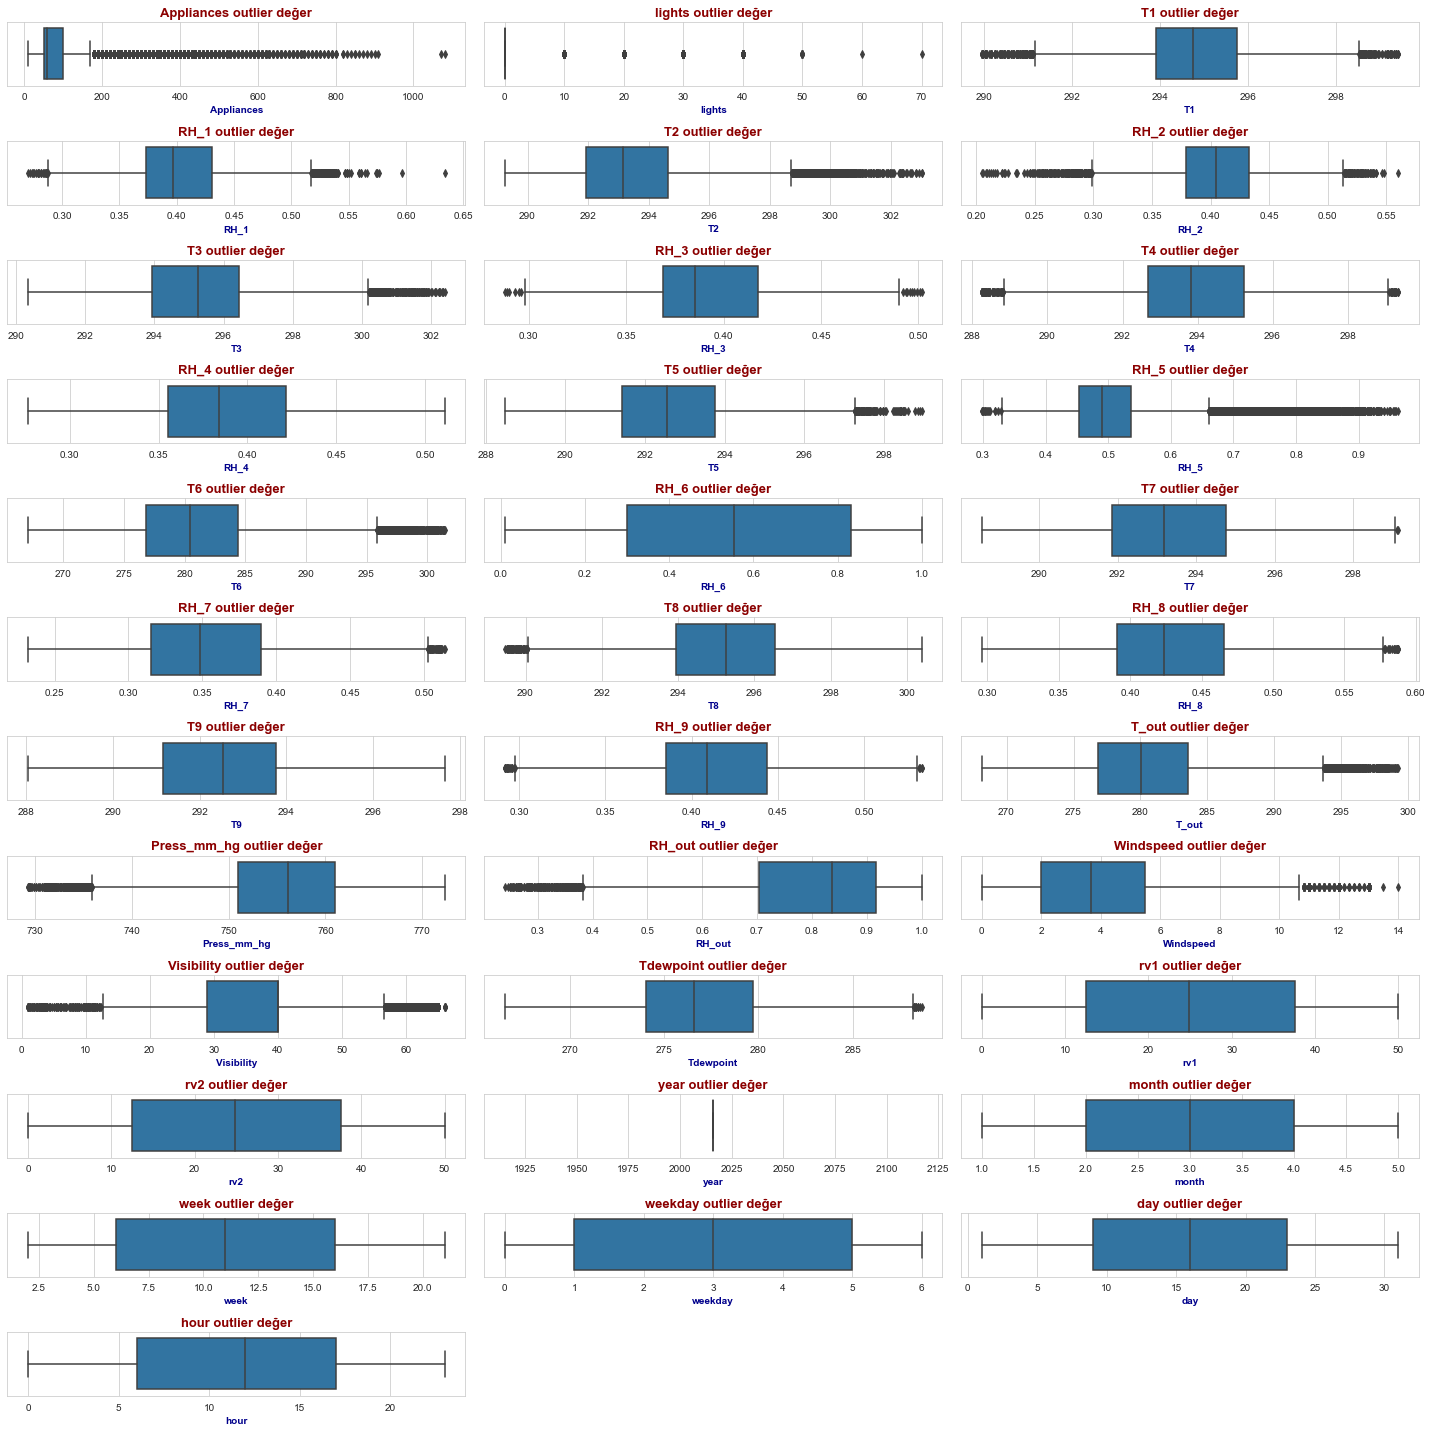

In [14]:
features = list(df.select_dtypes(include=['float64',"int64"]).columns)

plt.figure(figsize=(20,20))

for i in range(0,len(features)):
    plt.subplot(12,3,i+1)
    sns.boxplot(features[i],data=df)
    plt.title(features[i]+" outlier değer",fontdict=baslik_font)
    plt.xlabel(features[i],fontdict=eksen_font)
    plt.tight_layout()
    
plt.show()

In [15]:
df["hour1"] = df["hour"]

In [16]:
#Let's obtain a new variable from the interaction of these two variables that we created:

hour_lights = df[["hour1","lights"]]
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
hour_lights = pf.fit_transform(hour_lights)
hour_lights

array([[ 17.,  30., 289., 510., 900.],
       [ 17.,  30., 289., 510., 900.],
       [ 17.,  30., 289., 510., 900.],
       ...,
       [ 17.,  10., 289., 170., 100.],
       [ 17.,  10., 289., 170., 100.],
       [ 18.,  10., 324., 180., 100.]])

In [17]:
int_hour_lights = pd.DataFrame(hour_lights,columns=["hour1","lights",
                                              "hour*2","hour_lights","lights*2"])

In [18]:
#We will obtain a new variable from the interaction of the two variables we just created.:

rh_out_t_out = df[["RH_out","T_out"]]
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
rh_out_t_out = pf.fit_transform(rh_out_t_out)
rh_out_t_out

array([[9.20000000e-01, 2.79750000e+02, 8.46400000e-01, 2.57370000e+02,
        7.82600625e+04],
       [9.20000000e-01, 2.79633333e+02, 8.46400000e-01, 2.57262667e+02,
        7.81948011e+04],
       [9.20000000e-01, 2.79516667e+02, 8.46400000e-01, 2.57155333e+02,
        7.81295669e+04],
       ...,
       [5.63333333e-01, 2.95616667e+02, 3.17344444e-01, 1.66530722e+02,
        8.73892136e+04],
       [5.66666667e-01, 2.95483333e+02, 3.21111111e-01, 1.67440556e+02,
        8.73104003e+04],
       [5.70000000e-01, 2.95350000e+02, 3.24900000e-01, 1.68349500e+02,
        8.72316225e+04]])

In [19]:
int_rhout_tout = pd.DataFrame(rh_out_t_out,columns=["rh_out","t_out",
                                              "rh_out*2","rh_out_t_out","t_out*2"])

In [20]:
df = pd.concat([df,int_hour_lights[["hour*2","hour_lights","lights*2"]],
                int_rhout_tout[["rh_out*2","rh_out_t_out","t_out*2"]]],axis = 1)

In [21]:
df_hour=pd.concat([df.groupby(['month','day','hour']).Appliances.sum(),
           df.groupby(['month','day','hour']).mean().drop('Appliances',axis=1)],axis=1)
df_hour.head(10)

Appliances     lights          T1      RH_1          T2  \
month day hour                                                            
1     11  17           330  35.000000  293.040000  0.465028  292.350000   
          18          1060  51.666667  293.047778  0.458790  292.418889   
          19          1040  25.000000  293.645556  0.528056  293.075556   
          20           750  35.000000  294.111111  0.484533  293.401111   
          21           620  23.333333  294.461667  0.457683  293.737778   
          22          1600  21.666667  294.722222  0.446633  294.055556   
          23           340  18.333333  294.681667  0.442711  294.084444   
      12  0            850  16.666667  294.416111  0.449606  293.787222   
          1           1010   8.333333  294.113611  0.456132  293.483333   
          2            270   0.000000  293.846667  0.461978  293.216667   

                    RH_2          T3      RH_3          T4      RH_4  \
month day hour                                                         
1     11  17    0.446265  292.940000  0.448978  292.082778  0.457388   
          18    0.444389  292.920000  0.448633  292.058333  0.460667   
          19    0.460617  293.202222  0.472274  292.119444  0.478156   
          20    0.456326  293.363889  0.472689  292.340833  0.492279   
          21    0.449611  293.523333  0.461644  292.575556  0.479189   
          22    0.441189  293.619444  0.458294  293.258889  0.475067   
          23    0.437125  293.467917  0.456958  294.059722  0.465512   
      12  0     0.440183  293.294444  0.455422  293.664444  0.471128   
          1     0.442733  293.283333  0.455400  294.655556  0.469467   
          2     0.445033  293.320833  0.454542  294.293056  0.459056   

                        T5      RH_5          T6      RH_6          T7  \
month day hour                                                           
1     11  17    290.316667  0.551167  279.736667  0.842600  290.327778   
          18    290.261111  0.549778  279.330000  0.872044  290.379583   
          19    290.286111  0.558699  279.007361  0.881314  291.000000   
          20    290.765556  0.740278  278.619444  0.869339  290.782222   
          21    291.577222  0.690378  278.728889  0.861294  291.013611   
          22    292.262917  0.531293  278.980000  0.852564  290.925000   
          23    292.425000  0.509233  278.888889  0.864389  290.850000   
      12  0     292.305556  0.503961  278.613333  0.891072  290.905000   
          1     292.119444  0.500761  277.960000  0.910450  290.940000   
          2     291.963333  0.501221  277.400556  0.926900  290.995556   

                    RH_7          T8      RH_8          T9      RH_9  \
month day hour                                                         
1     11  17    0.414000  291.300000  0.487106  290.166667  0.454467   
          18    0.420468  291.244444  0.485972  290.131667  0.452900   
          19    0.450178  291.306111  0.492133  290.052222  0.453114   
          20    0.429200  291.923333  0.501956  290.040000  0.451189   
          21    0.436183  292.303333  0.495422  290.040000  0.448078   
          22    0.429444  292.492778  0.490167  290.006667  0.445276   
          23    0.432411  292.534444  0.502722  290.040000  0.452411   
      12  0     0.445900  292.546667  0.516956  290.040000  0.458750   
          1     0.457286  292.430000  0.532478  290.040000  0.463078   
          2     0.460189  292.342639  0.548682  290.125556  0.472633   

                     T_out  Press_mm_hg    RH_out  Windspeed  Visibility  \
month day hour                                                             
1     11  17    279.458333   733.750000  0.920000   6.166667   53.416667   
          18    279.091667   734.266667  0.915833   5.416667   40.000000   
          19    279.150000   734.791667  0.897500   6.000000   40.000000   
          20    279.150000   735.283333  0.875833   6.000000   40.000000   
          21    278.983333   735.566667 

In [22]:
#look at the outlier numbers:

features = list(df_hour.select_dtypes(include=['float64',"int64"]).columns)

Q1 = df_hour.quantile(0.25)
Q3 = df_hour.quantile(0.75)
IQR = Q3-Q1
((df_hour[features] < (Q1-1.5*IQR)) | (df_hour[features] > (Q3+1.5*IQR))).sum()

Appliances      345
lights          534
T1               75
RH_1             21
T2               96
RH_2             41
T3               33
RH_3              1
T4               35
RH_4              0
T5               28
RH_5            209
T6               86
RH_6              0
T7                0
RH_7              5
T8               12
RH_8              3
T9                2
RH_9              4
T_out            71
Press_mm_hg      36
RH_out           42
Windspeed        38
Visibility      443
Tdewpoint         1
rv1              12
rv2              12
year              0
week              0
weekday           0
hour1             0
hour*2            0
hour_lights     574
lights*2        616
rh_out*2          0
rh_out_t_out     45
t_out*2          78
dtype: int64

In [23]:
df_hour_win = df_hour.copy()

In [24]:
#winsorize for outlier values:

df_hour_win["lights"] = winsorize(df_hour_win["lights"],(0,0.17))
df_hour_win["hour_lights"] = winsorize(df_hour_win["hour_lights"],(0.01,0.19))
df_hour_win["lights*2"] = winsorize(df_hour_win["lights*2"],(0,0.2))
df_hour_win["T1"] = winsorize(df_hour_win["T1"],(0.1,0.1))
df_hour_win["RH_1"] = winsorize(df_hour_win["RH_1"],(0.06,0.06))
df_hour_win["T2"] = winsorize(df_hour_win["T2"],(0,0.06))
df_hour_win["RH_2"] = winsorize(df_hour_win["RH_2"],(0.01,0.09))
df_hour_win["T3"] = winsorize(df_hour_win["T3"],(0,0.09))
df_hour_win["RH_3"] = winsorize(df_hour_win["RH_3"],(0,0.01))
df_hour_win["T4"] = winsorize(df_hour_win["T4"],(0.01,0.01))
df_hour_win["T5"] = winsorize(df_hour_win["T5"],(0.01,0.01))
df_hour_win["RH_5"] = winsorize(df_hour_win["RH_5"],(0.01,0.09))
df_hour_win["T6"] = winsorize(df_hour_win["T6"],(0.01,0.09))
df_hour_win["RH_7"] = winsorize(df_hour_win["RH_7"],(0.01,0.01))
df_hour_win["T8"] = winsorize(df_hour_win["T8"],(0.01,0.01))
df_hour_win["RH_8"] = winsorize(df_hour_win["RH_8"],(0.01,0.01))
df_hour_win["T9"] = winsorize(df_hour_win["T9"],(0.01,0.01))
df_hour_win["RH_9"] = winsorize(df_hour_win["RH_9"],(0.01,0.01))
df_hour_win["T9"] = winsorize(df_hour_win["T9"],(0.01,0.01))
df_hour_win["T_out"] = winsorize(df_hour_win["T_out"],(0.01,0.06))
df_hour_win["Press_mm_hg"] = winsorize(df_hour_win["Press_mm_hg"],(0.09,0))
df_hour_win["RH_out"] = winsorize(df_hour_win["RH_out"],(0.06,0))
df_hour_win["Windspeed"] = winsorize(df_hour_win["Windspeed"],(0,0.09))
df_hour_win["Visibility"] = winsorize(df_hour_win["Visibility"],(0.1,0.15))
df_hour_win["Tdewpoint"] = winsorize(df_hour_win["Tdewpoint"],(0.01,0.01))
df_hour_win["rv1"] = winsorize(df_hour_win["rv1"],(0.01,0.01))
df_hour_win["rv2"] = winsorize(df_hour_win["rv2"],(0.01,0.01))
df_hour_win["rh_out_t_out"] = winsorize(df_hour_win["rh_out_t_out"],(0.02,0.01))
df_hour_win["t_out*2"] = winsorize(df_hour_win["t_out*2"],(0,0.03))

In [25]:
#average temperature and humidity of the house:
house_rh = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
house_T = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
df_hour_win["house_T"] = df_hour_win[house_T].sum(axis=1)/len(house_T)
df_hour_win["house_rh"] = df_hour_win[house_rh].sum(axis=1)/len(house_rh)
df_hour_win["house_t_house_rh"] = df_hour_win["house_T"]*df_hour_win["house_rh"]

In [26]:
df_hour_win["t1rh1"] = df_hour_win.T1*df_hour_win.RH_1
df_hour_win["t2rh2"] = df_hour_win.T2*df_hour_win.RH_2
df_hour_win["t3rh3"] = df_hour_win.T3*df_hour_win.RH_3
df_hour_win["t4rh4"] = df_hour_win.T4*df_hour_win.RH_4
df_hour_win["t5rh5"] = df_hour_win.T5*df_hour_win.RH_5
df_hour_win["t6rh6"] = df_hour_win.T6*df_hour_win.RH_6
df_hour_win["t7rh7"] = df_hour_win.T7*df_hour_win.RH_7
df_hour_win["t8rh8"] = df_hour_win.T8*df_hour_win.RH_8
df_hour_win["t9rh9"] = df_hour_win.T9*df_hour_win.RH_9
df_hour_win["t7rh6"] = df_hour_win.T7*df_hour_win.RH_6
df_hour_win["rh4windspeed"] = df_hour_win.RH_4*df_hour_win.Windspeed
df_hour_win["rh1press"] = df_hour_win.RH_1*df_hour_win.Press_mm_hg
df_hour_win["tout_tdewpoint"] = df_hour_win.T_out*df_hour_win.Tdewpoint

In [27]:
df_hour_win["lights1"] = (df_hour_win["lights"])**3 
df_hour_win["hour_lights1"] = (df_hour_win["hour_lights"])**3

In [28]:
def mean_(df_hour_win, cat_feature, real_feature):

    return dict(df_hour_win.groupby(cat_feature)[real_feature].mean())

df_hour_win['weekday_avg'] = list(map(
    mean_(df_hour_win[:], 'weekday', "Appliances").get, df_hour_win.weekday))
df_hour_win['hour_avg'] = list(map(
    mean_(df_hour_win[:], 'hour', "Appliances").get, df_hour_win.hour1))

In [29]:

df_hour_win['low_consum'] = (df_hour_win.Appliances<(df_hour_win.hour_avg))*1
df_hour_win['high_consum'] = (df_hour_win.Appliances>(df_hour_win.hour_avg))*1

In [30]:
features = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2',  'weekday', 
       'hour1', 'house_T', 'house_rh', 'house_t_house_rh', 't1rh1', 't2rh2',
       't3rh3', 't4rh4', 't5rh5', 't6rh6', 't7rh7', 't8rh8', 't9rh9', 't7rh6',
       'rh4windspeed', 'rh1press', 'tout_tdewpoint', 'hour*2', 'hour_lights',
       'lights*2', 'rh_out*2', 'rh_out_t_out', 't_out*2', 'lights1',
       'hour_lights1', 'weekday_avg', 'hour_avg', 'low_consum', 'high_consum']
df_corr_win = df_hour_win[features].corr().Appliances.abs().sort_values(ascending=False).index[0:40]
df_hour_win[df_corr_win].corr().Appliances.head()

Appliances     1.000000
high_consum    0.515782
low_consum    -0.515782
hour_avg       0.488547
hour_lights    0.323897
Name: Appliances, dtype: float64

Another common way to deal with outliers is by transforming the variable. Conversion helps us not only with outliers but also with abnormal or near-normal distributions. When transforming the variable, we usually apply monotonic transformations. These conversions do not change the relative order of values in a variable. Log transform and square root transform are the most used transformations in data science.

In [31]:
#It seems before any implementation that the variables are not normally distributed.(p < 0.05)

pd.options.display.float_format = '{:.5f}'.format

features = list(df_hour.select_dtypes(include=['float64',"int64"]).columns)
dagilim_testleri = pd.DataFrame(columns=['feature', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for feature in features:
    jb_stats = jarque_bera(df_hour[feature])
    norm_stats = normaltest(df_hour[feature])
    dagilim_testleri = dagilim_testleri.append({"feature": feature,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri.head()

,feature,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,Appliances,8634.76660,0.00000,1624.49336,0.00000
1,lights,4897.54536,0.00000,1372.79804,0.00000
2,T1,11.93239,0.00256,11.64215,0.00296
3,RH_1,101.25897,0.00000,93.59675,0.00000
4,T2,549.49164,0.00000,384.84940,0.00000


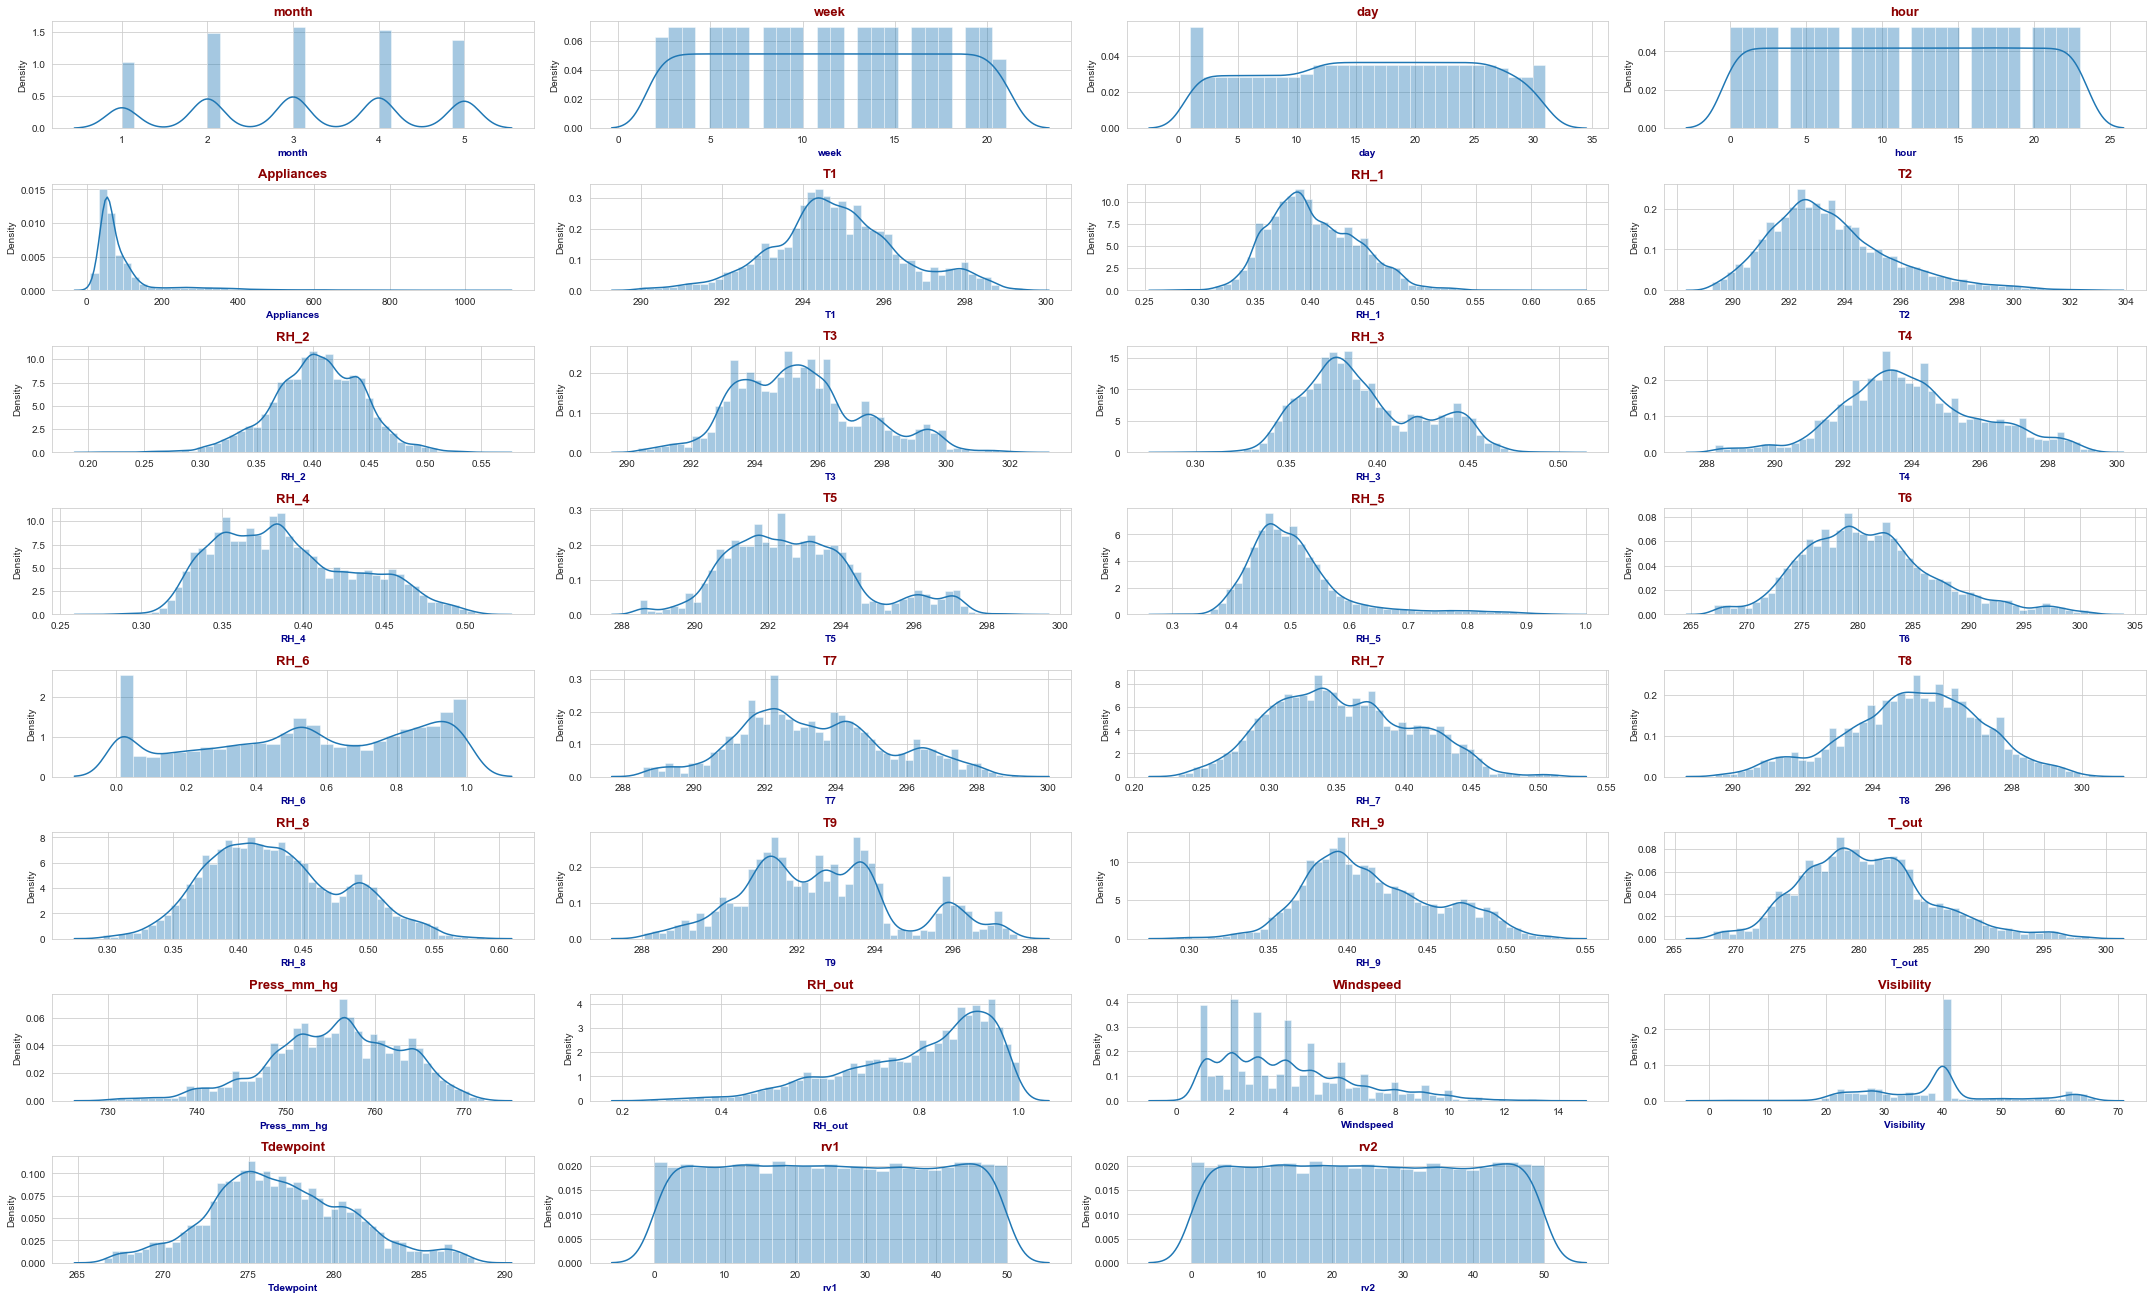

In [32]:
# before implementing any transformation:

features = ["month","week","day","hour",'Appliances',
         'T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
         'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']

plt.figure(figsize=(30,20))

for i in range(0,len(features)):
    plt.subplot(9,4,i+1)
    sns.distplot(df[features[i]])
    plt.title(features[i],fontdict=baslik_font)
    plt.xlabel(features[i],fontdict=eksen_font)
    plt.tight_layout()
    
plt.show()

In order to perform log transformation, there should not be values equal to and less than zero, we will add these values to the dataset by applying square root transformation

In [33]:

for i in df_hour_win.columns:
    if any(df_hour_win[i]<=0):
        print(i)

lights
weekday
hour1
hour*2
hour_lights
lights*2
lights1
hour_lights1
low_consum
high_consum


In [34]:
#Square root transformation for values equal to and less than zero:

df_kare = df_hour_win[['lights',"weekday","hour1", 'hour*2',"hour_lights",'lights*2','lights1', 
                       "hour_lights1",'T8', "Press_mm_hg", 'Windspeed',"low_consum","high_consum"]]
df_kare = np.sqrt(df_kare)



In [35]:
#Applying log transformation to df_hour_win data set:

df_hour_win_log = np.log(df_hour_win)
df_hour_win_log = df_hour_win_log.drop(["hour1",'lights', 'hour*2', 'T8', "Press_mm_hg","hour_lights", 
                                        'lights1',"hour_lights1",'Windspeed', 
                                        'lights*2',"low_consum","high_consum"],axis=1)
df_hour_win_log = pd.concat([df_hour_win_log,df_kare],axis=1)

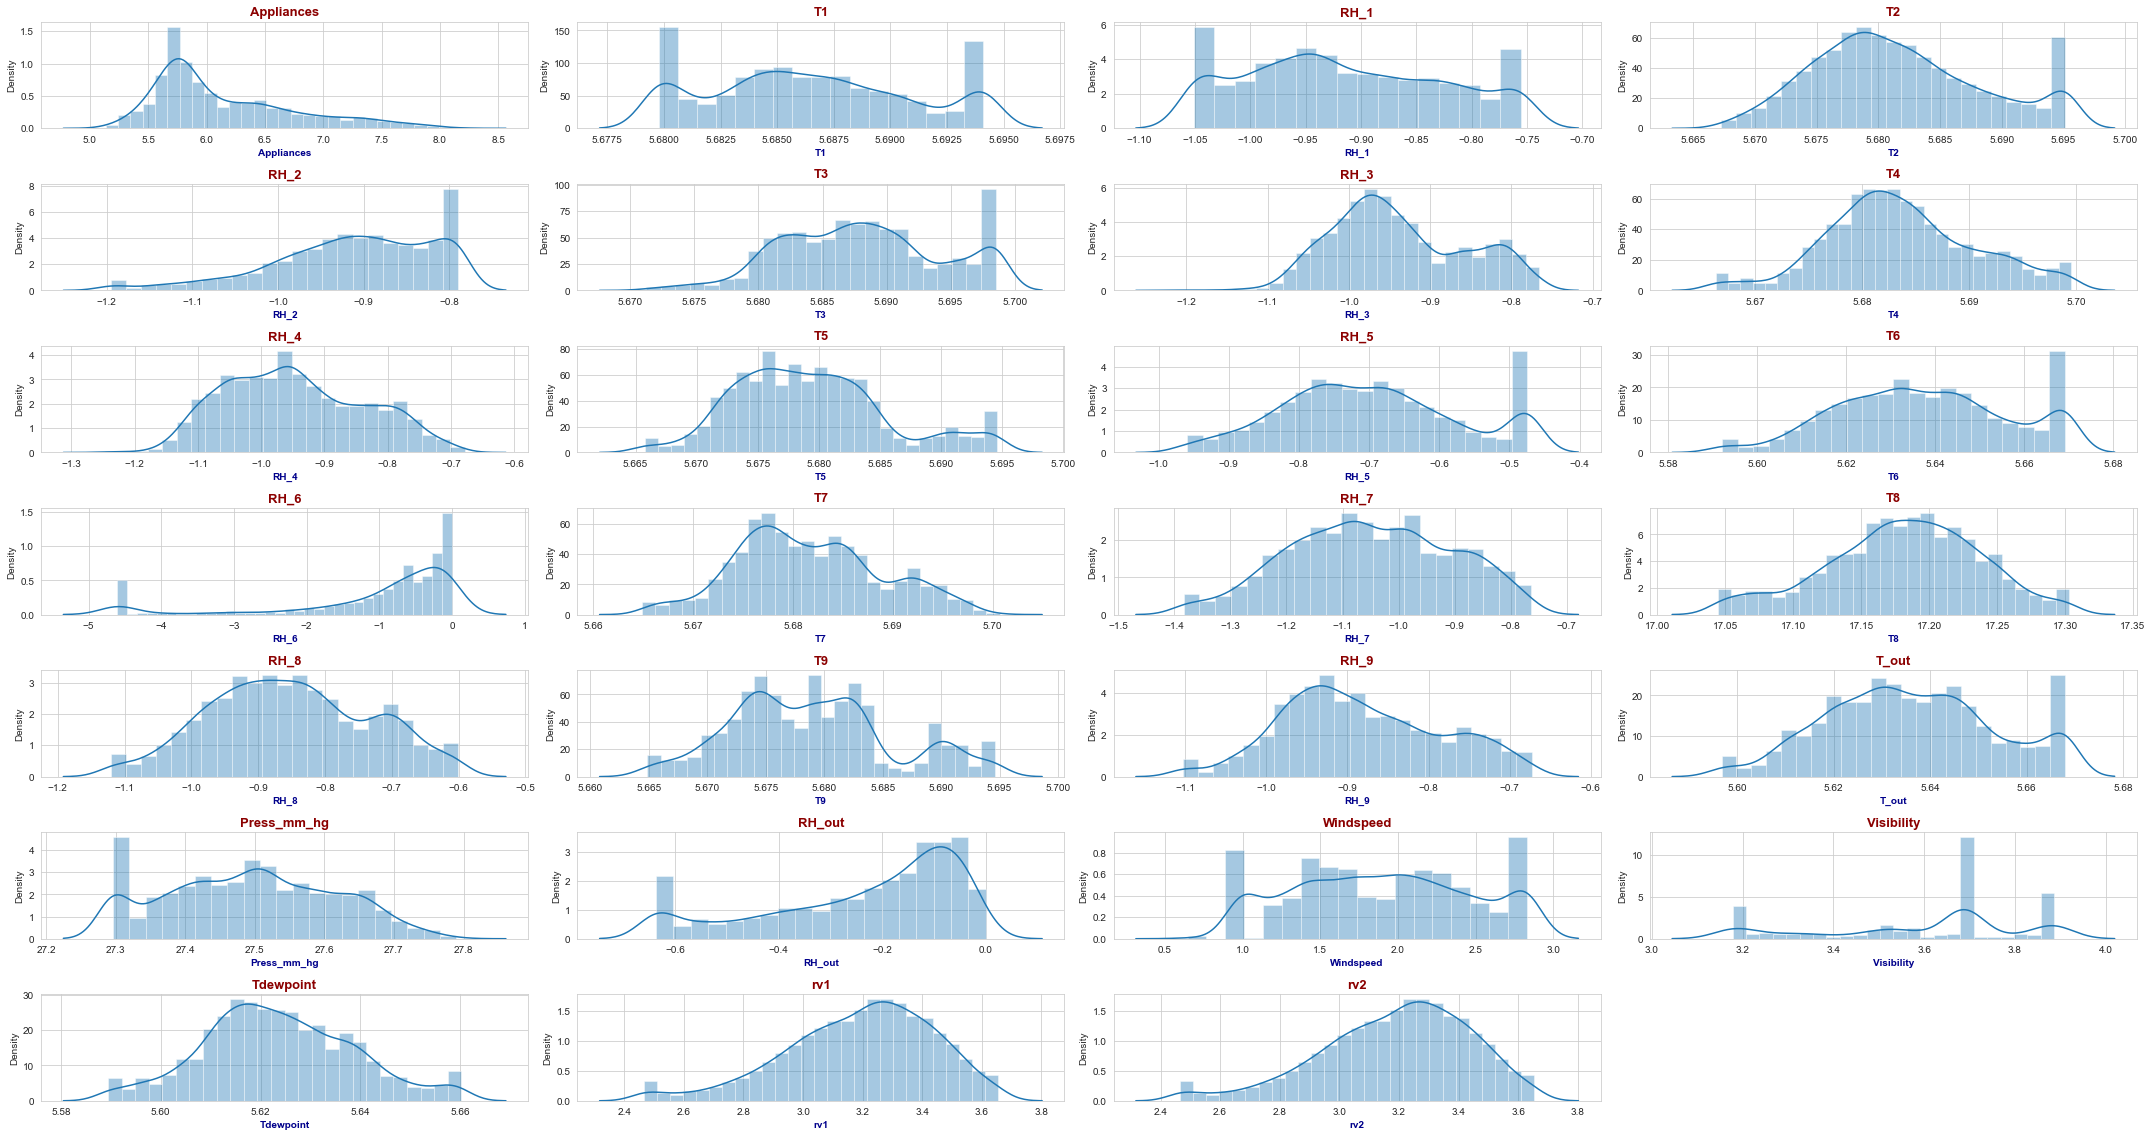

In [36]:
# After winsorize the outliers of the data set, log transformation is applied to the whole data set:

features = ['Appliances','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8',
            'RH_8','T9','RH_9','T_out',
         'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']

plt.figure(figsize=(30,20))

for i in range(0,len(features)):
    plt.subplot(9,4,i+1)
    sns.distplot(df_hour_win_log[features[i]])
    plt.title(features[i],fontdict=baslik_font)
    plt.xlabel(features[i],fontdict=eksen_font)
    plt.tight_layout()
    
plt.show()

### 5.Exploring the Data

Relationships of variables with each other and with Appliances :

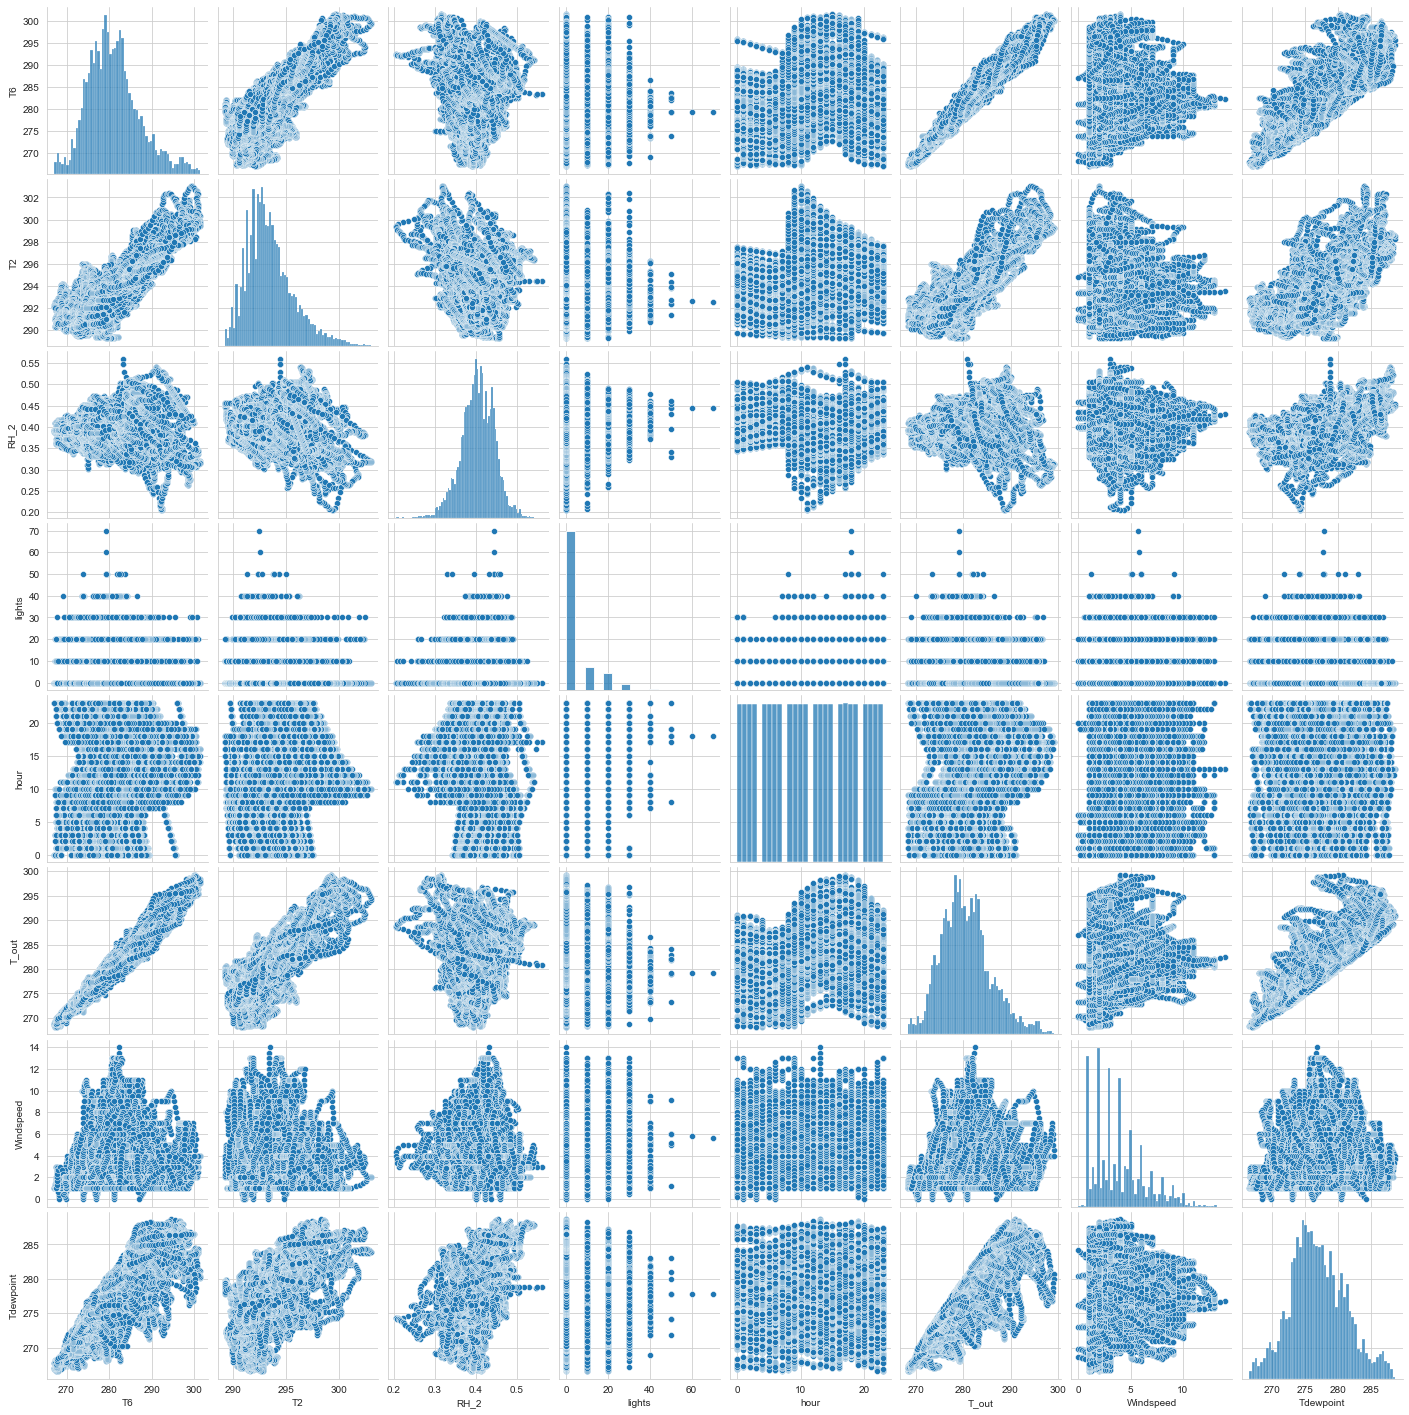

In [37]:
col = ['T6','T2', 'RH_2','lights','hour','T_out','Windspeed','Tdewpoint']
sns.pairplot(df[col])
plt.show()

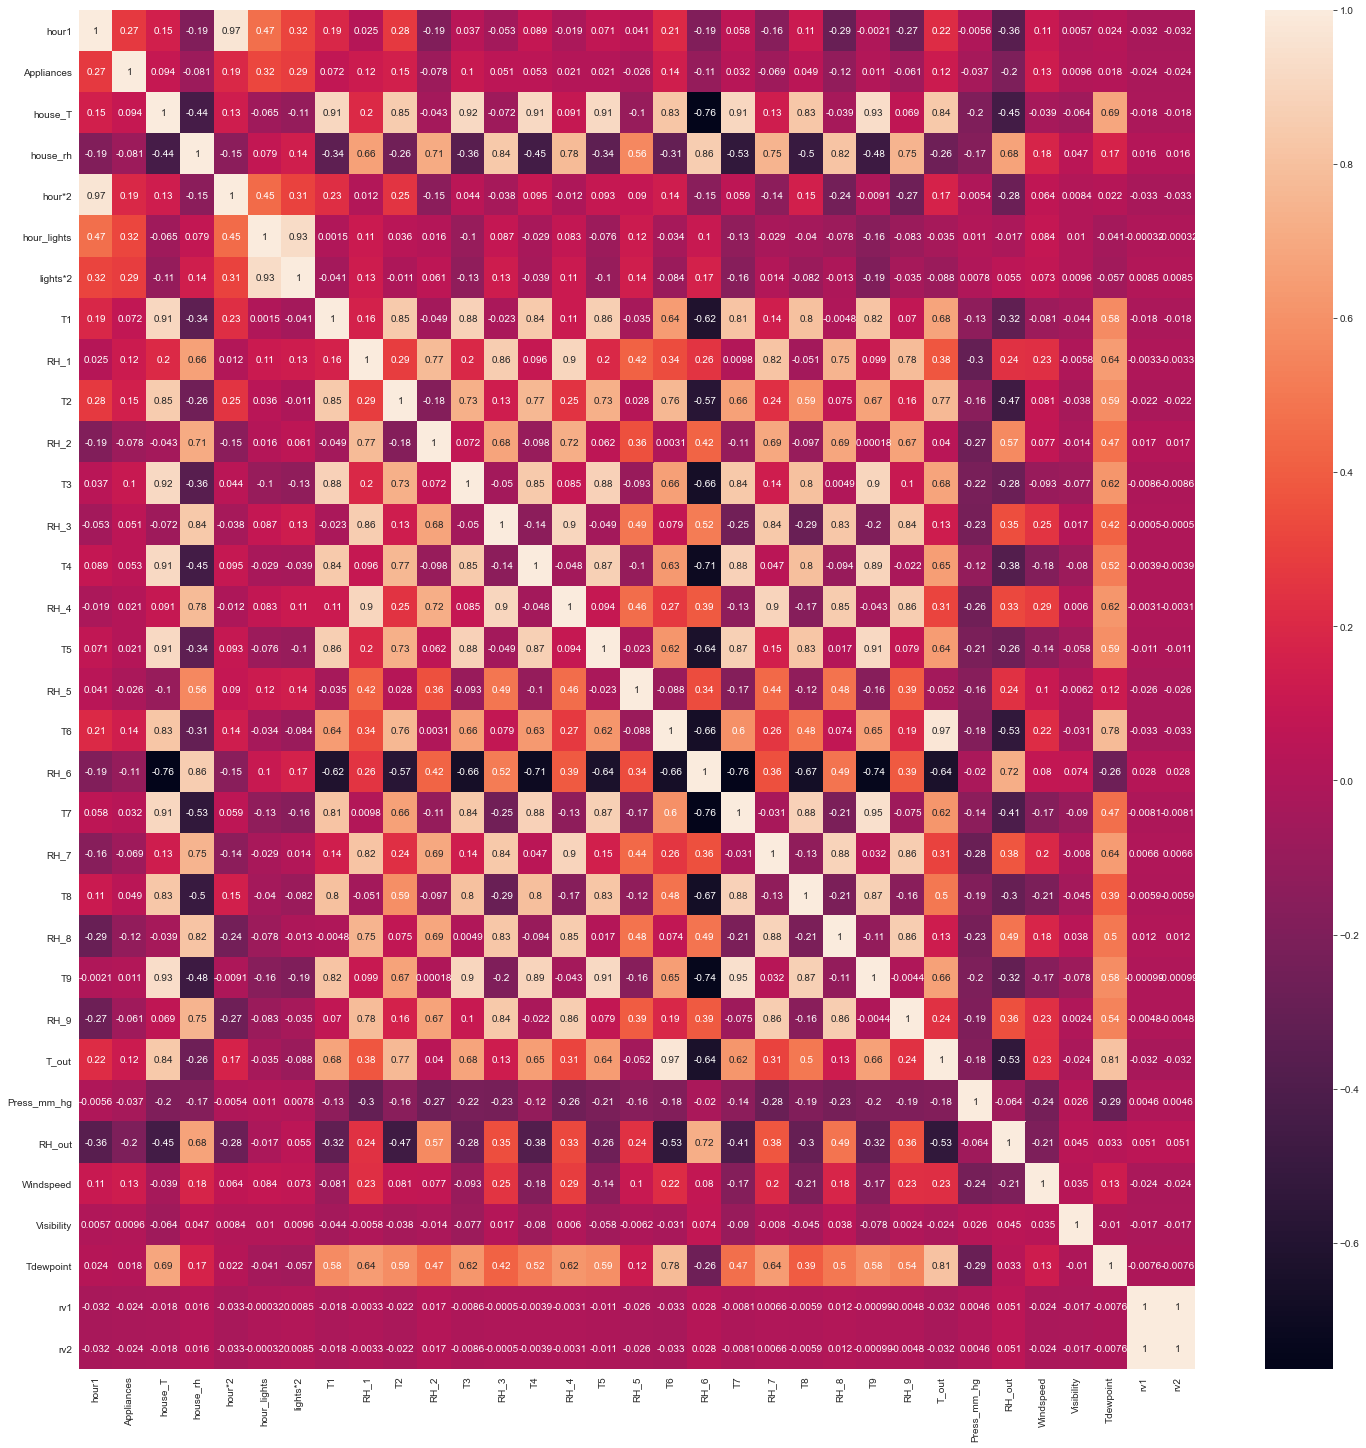

In [38]:
features = ["hour1",'Appliances',"house_T",
         "house_rh","hour*2","hour_lights","lights*2",'T1',
         'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
         'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2']
plt.figure(figsize=(25,25))
sns.heatmap((df_hour_win[features]).corr(),annot=True,)
plt.show()

In [39]:
df = df.set_index('date')

<function matplotlib.pyplot.show(*args, **kw)>

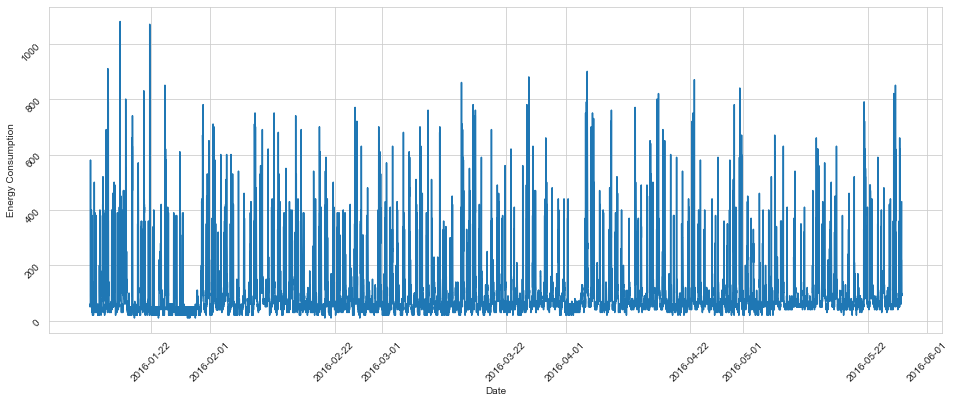

In [40]:
plt.figure(figsize=(16,6))
plt.plot(df['Appliances'])          
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show

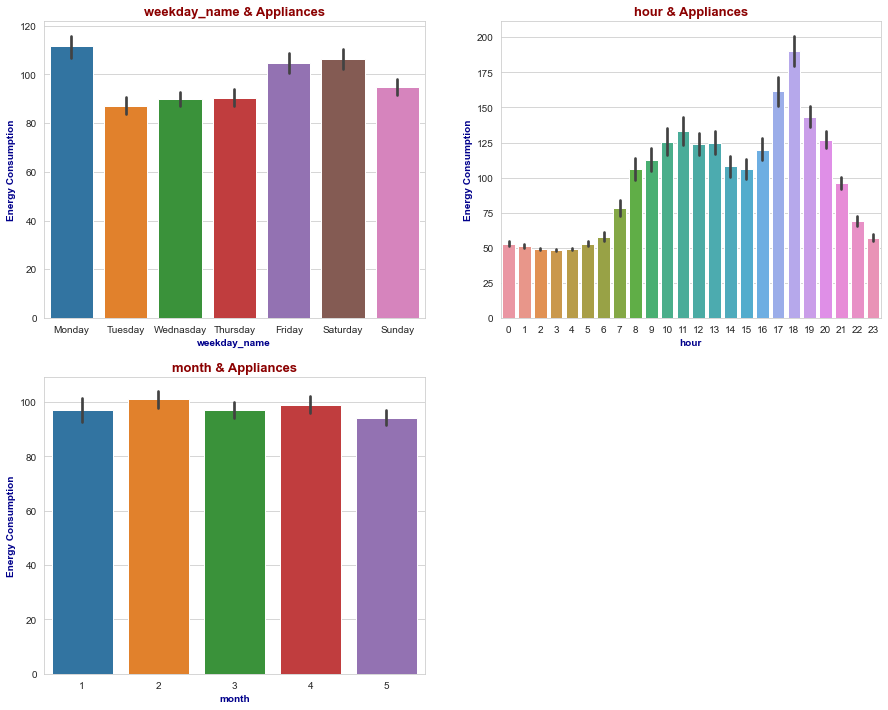

In [41]:
plt.figure(figsize=(15,12))
variables = ["weekday_name","hour","month"]

for i in range(0,len(variables)):
    
    plt.subplot(2,2,i+1)
    sns.barplot(df[variables[i]],"Appliances",data=df)
    plt.title(variables[i]+" & Appliances",fontdict=baslik_font)
    plt.xlabel(variables[i],fontdict=eksen_font)
    plt.ylabel("Energy Consumption",fontdict=eksen_font)

### 6.Building Model

In [42]:
df_hour_win_log["hour_avg**2"] = df_hour_win_log["hour_avg"]**2

In [43]:
df_hour_win_log["1/hour_avg"] = 1/df_hour_win_log["hour_avg"]
df_hour_win_log["rh_out_hour"] = df_hour_win_log["RH_out"]*df_hour_win_log["hour1"]
df_hour_win_log["low_consum_hour"] = df_hour_win_log["low_consum"]*df_hour_win_log["hour1"]

#### 1.Model OLS,without feature engineering: with no new variables added

In [44]:
model1 = ['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
        'T6', 'T8', 'RH_8', 'T9','T_out',  'RH_out', 'Windspeed', 
       'Tdewpoint',  'hour1']
y = df_hour_win_log["Appliances"]
X = df_hour_win_log[model1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

print("X_train observation number {}".format(X_train.shape[0]))
print("X_test observation number {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

X_train observation number 2632
X_test observation number 658


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.72e-246
Time:                        14:27:25   Log-Likelihood:                -1842.0
No. Observations:                2632   AIC:                             3716.
Df Residuals:                    2616   BIC:                             3810.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.9335     18.187      3.625      0.000      30.272     101.595
lights         0.1360      0.009     14.701      0.000       0.118       0.154
RH_1           4.2131      0.367     11.473      0.000       3.493       4.933
T2           -30.8317      4.267     -7.226      0.000     -39.199     -22.465
RH_2          -3.3034      0.322    -10.259      0.000      -3.935      -2.672
T3            47.5536      4.148     11.465      0.000      39.420      55.687
RH_3           0.7952      0.345      2.303      0.021       0.118       1.472
T6            17.6999      2.470      7.167      0.000      12.858      22.542
T8             2.8343      0.397      7.140      0.000       2.056       3.613
RH_8          -1.2408      0.189     -6.579      0.000      -1.611      -0.871
T9           -34.0999      4.745     -7.187      0.000     -43.404     -24.796
T_out        -26.3181      4.171     -6.309      0.000     -34.498     -18.138
RH_out        -0.4742      0.180     -2.628      0.009      -0.828      -0.120
Windspeed      0.0556      0.020      2.809      0.005       0.017       0.094
Tdewpoint      6.8139      3.435      1.984      0.047       0.079      13.549
hour1          0.0839      0.010      8.350      0.000       0.064       0.104
==============================================================================
Omnibus:                      333.295   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.351
Skew:                           0.927   Prob(JB):                    3.32e-107
Kurtosis:                       4.016   Cond. No.                     4.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

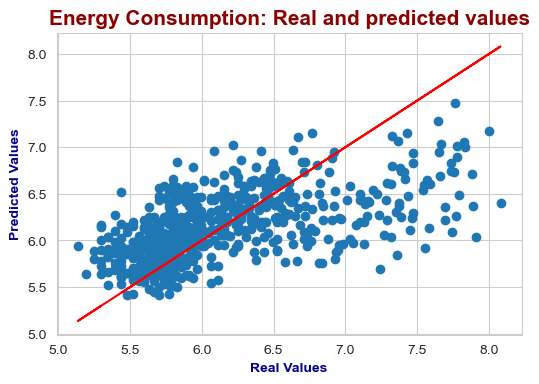

Mean Absolute Error (MAE)        : 0.3633155109186482
Mean Square Error (MSE)          : 0.23511161691095564
Root Mean Square Error (RMSE)     : 0.4848830961282891
Mean Absolute Percent Error (MAPE) : 5.757613352258964


In [45]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Energy Consumption: Real and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Square Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Square Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percent Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### 2.Model OLS, feature engineered version: with new variables added

In [46]:
model1 = ['T1',   'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5',  'T6', 'RH_6', 'RH_out', 'house_T', 'house_rh', 'house_t_house_rh', 
       't6rh6', 'rh_out*2','T8',  'hour_lights',  
       'Windspeed',  'low_consum', 'high_consum', 'hour_avg**2',
        'low_consum_hour', 'rh_out_hour']
y = df_hour_win_log["Appliances"]
X = df_hour_win_log[model1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

print("X_train observation number {}".format(X_train.shape[0]))
print("X_test observation number {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

X_train observation number 2632
X_test observation number 658


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     379.2
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        14:27:26   Log-Likelihood:                -651.12
No. Observations:                2632   AIC:                             1344.
Df Residuals:                    2611   BIC:                             1468.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.6758     12.186      3.338      0.001      16.781      64.571
T1                  10.5036      4.473      2.348      0.019       1.733      19.274
RH_2                -0.7139      0.144     -4.968      0.000      -0.996      -0.432
T3                  30.1554      3.496      8.625      0.000      23.300      37.011
RH_3                 1.3763      0.226      6.102      0.000       0.934       1.819
T4                  11.3351      3.554      3.190      0.001       4.367      18.303
RH_4                -0.5650      0.213     -2.657      0.008      -0.982      -0.148
T5                  13.0558      3.908      3.341      0.001       5.393      20.718
T6                   6.7654      1.222      5.535      0.000       4.369       9.162
RH_6                -3.4035      0.611     -5.570      0.000      -4.602      -2.205
RH_out               0.5903      0.179      3.294      0.001       0.239       0.942
house_T            -63.6949      9.413     -6.767      0.000     -82.152     -45.238
house_rh            31.9056      4.704      6.783      0.000      22.683      41.129
house_t_house_rh   -31.7892      4.711     -6.748      0.000     -41.027     -22.551
t6rh6                3.3618      0.611      5.500      0.000       2.163       4.560
rh_out*2             0.1761      0.063      2.781      0.005       0.052       0.300
T8                   3.3729      0.391      8.631      0.000       2.607       4.139
hour_lights          0.0231      0.002     11.657      0.000       0.019       0.027
Windspeed            0.0405      0.013      3.098      0.002       0.015       0.066
low_consum          20.1603      6.091      3.310      0.001       8.216      32.104
high_consum         20.5155      6.095      3.366      0.001       8.564      32.467
hour_avg**2          0.0700      0.002     42.240      0.000       0.067       0.073
low_consum_hour     -0.1050      0.009    -11.952      0.000      -0.122      -0.088
rh_out_hour         -0.2365      0.033     -7.106      0.000      -0.302      -0.171
==============================================================================
Omnibus:                      111.118   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.645
Skew:                           0.392   Prob(JB):                     2.92e-36
Kurtosis:                       3.937   Cond. No.                     3.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

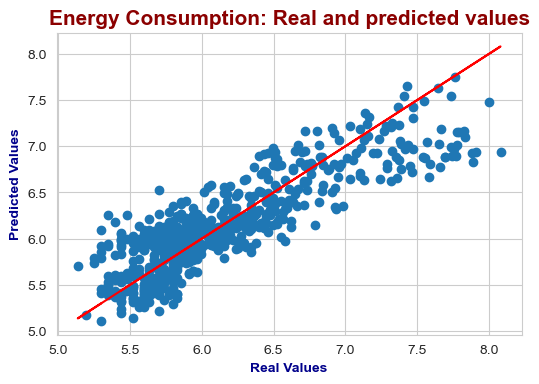

Mean Absolute Error (MAE)        : 0.2459702442496365
Mean Square Error (MSE)          : 0.09616390286400046
Root Mean Square Error (RMSE)     : 0.31010305200691024
Mean Absolute Percent Error (MAPE) : 3.9780629704112216


In [47]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Energy Consumption: Real and predicted values", fontdict=baslik_font)
plt.show()

print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Square Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Square Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Absolute Percent Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [48]:
df_hour_win_log.drop("weekday",axis=1,inplace=True)

### 3.Model OLS :using pca in variable selection

In [49]:
y = df_hour_win_log["Appliances"]
X = df_hour_win_log.drop(["Appliances"],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

In [50]:
from sklearn.decomposition import PCA

# reduction of the train set
pca = PCA()
X_reduced_train = pca.fit_transform(X_train)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:20]

array([ 99.89,  99.96,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  ])

In [51]:
lrm = LinearRegression()
pca_model = lrm.fit(X_reduced_train,y_train)
print(pca_model.intercept_)
print(pca_model.coef_[0:5])

6.156213081601648
[ 0.00087289 -0.02708593 -0.05115723 -0.0183268   0.02182007]


In [52]:
# reduction of the test set
pca2 = PCA()
X_reduced_test = pca2.fit_transform(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train = pca_model.predict(X_reduced_train)
y_pred_test = pca_model.predict(X_reduced_test)

#Train and test error before selecting the number of components
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))

0.3022003683629099
0.33251513714730396
0.7564460794684065
0.6946377928640027


In [54]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [55]:
## Reduced the optimum number of components for the model with the cross validation method
                                                        #We detected through train set
lrm = LinearRegression()

RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lrm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

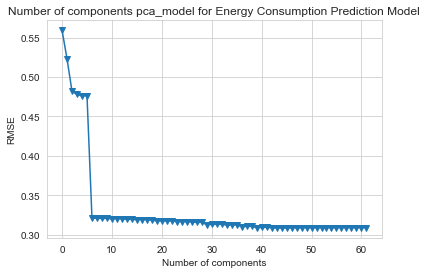

In [56]:
plt.plot(RMSE, '-v')
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.title('Number of components pca_model for Energy Consumption Prediction Model');

0.31960771520454545
0.33495996674662115


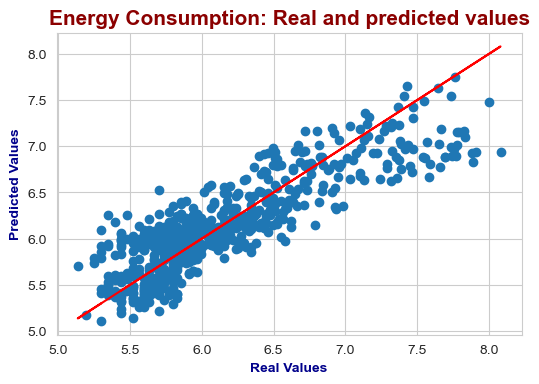

Number of observations in the training set: 2632
Number of observations in the test set    : 658 

R-Squared value in the training set  : 0.7275795819511022
Root Mean Square Error in training set (RMSE)     : 0.31960771520454545
------ Test set statistics --- 
Test set R-Square value        : 0.6901309116531571
Mean Absolute Error (MAE)        : 0.2484516744361322
Mean Square Error (MSE)          : 0.11219817932289754
Root Mean Square Error (RMSE)     : 0.33495996674662115
Mean Absolute Percent Error (MAPE) : 4.009712270771475


In [57]:
lrm = LinearRegression()
pca_model = lrm.fit(X_reduced_train[:,0:7],y_train)

y_pred_train = pca_model.predict(X_reduced_train[:,0:7])
y_pred_test = pca_model.predict(X_reduced_test[:,0:7])

print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))
plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Energy Consumption: Real and predicted values", fontdict=baslik_font)
plt.show()

print("Number of observations in the training set: {}".format(X_reduced_train.shape[0]))
print("Number of observations in the test set    : {}".format(X_reduced_test.shape[0]), "\n")

print("R-Squared value in the training set  : {}".format(pca_model.score(X_reduced_train[:,0:7], y_train)))
print("Root Mean Square Error in training set (RMSE)     : {}".format(rmse(y_train, y_pred_train)))

print("------ Test set statistics --- ")
print("Test set R-Square value        : {}".format(pca_model.score(X_reduced_test[:,0:7], y_test)))
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Mean Square Error (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Root Mean Square Error (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Mean Absolute Percent Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

### 4.Ridge Regression

In [58]:
from sklearn.linear_model import Ridge
y = df_hour_win_log["Appliances"]
X = df_hour_win_log.drop("Appliances",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)


In [59]:

lambdalar = 10**np.linspace(10,-2,1000)*0.5 

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

#optimum alpha
ridge_cv.fit(X_train,y_train)
ridge_cv.alpha_

0.005

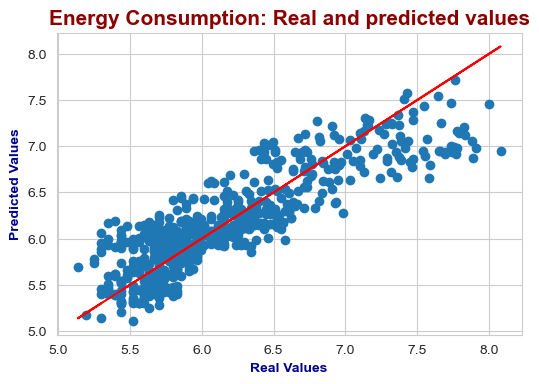

0.3031739004760525
0.3009368494966047
Number of observations in the training set : 2632
Number of observations in the test set    : 658 

R-Squared value in the training set  : 0.7548743442470867
Root Mean Square Error in training set (RMSE)     : 0.3031739004760525
------ Test set statistics --- 
Test set R-Square value        : 0.7498830149625112
Mean Absolute Error (MAE)        : 0.23477600345586713
Mean Square Error (MSE)          : 0.09056298738494212
Root Mean Square Error (RMSE)     : 0.3009368494966047
Mean Absolute Percent Error (MAPE) : 3.7922792490916164


In [60]:
# Now let's set up the model with the optimum alpha value.


ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(X_train,y_train)

y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_pred_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Energy Consumption: Real and predicted values", fontdict=baslik_font)
plt.show()
print(rmse(y_train,y_pred_train))
print(rmse(y_test,y_pred_test))

print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set    : {}".format(X_test.shape[0]), "\n")

print("R-Squared value in the training set  : {}".format(ridge_model.score(X_train, y_train)))
print("Root Mean Square Error in training set (RMSE)     : {}".format(rmse(y_train, y_pred_train)))

print("------ Test set statistics --- ")
print("Test set R-Square value        : {}".format(ridge_model.score(X_test, y_test)))
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_pred_test)))
print("Mean Square Error (MSE)          : {}".format(mse(y_test, y_pred_test)))
print("Root Mean Square Error (RMSE)     : {}".format(rmse(y_test, y_pred_test)))
print("Mean Absolute Percent Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100))

### 5.Model Polynomial Features

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.24242505037150666
R2 score of training set is 0.8432671123342106


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.24673725780619085
R2 score of test set is 0.8318635349681693


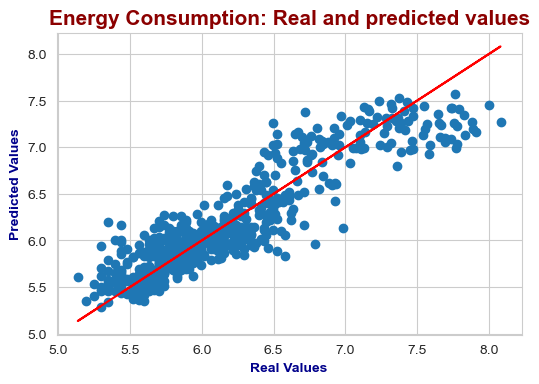

Number of observations in the training set : 2632
Number of observations in the test set    : 658 

R-Squared value in the training set : 0.8432671123342106
Root Mean Square Error in training set (RMSE)     : 0.24242505037150666
----Test set statistics---
Test set R-Square value          : 0.8318635349681693
Mean Absolute Error (MAE)        : 0.1865101542348408
Mean Square Error (MSE)          : 0.06087927438971869
Root Mean Square Error (RMSE)     : 0.24673725780619085
Mean Absolute Percent Error (MAPE) : 2.988505143895387


In [61]:
from sklearn.preprocessing import PolynomialFeatures
model1 = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
         'RH_6',  'RH_7',  'RH_8','hour1', 'house_T',   
             'tout_tdewpoint', 'hour*2', 
         'hour_avg', 'low_consum', 
          'high_consum',"hour_avg**2",]

y = df_hour_win_log["Appliances"]
X = df_hour_win_log[model1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=465)

poly_features= PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
  
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)
plt.scatter(y_test, y_test_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Real Values", fontdict=eksen_font)
plt.ylabel("Predicted Values", fontdict=eksen_font)
plt.title("Energy Consumption: Real and predicted values", fontdict=baslik_font)
plt.show()


print("Number of observations in the training set : {}".format(X_train.shape[0]))
print("Number of observations in the test set    : {}".format(X_test.shape[0]), "\n")

print("R-Squared value in the training set : {}".format(poly_model.score(X_train_poly, y_train)))
print("Root Mean Square Error in training set (RMSE)     : {}".format(rmse(y_train, y_train_predicted)))

print("----Test set statistics---")
print("Test set R-Square value          : {}".format(r2_score(y_test, y_test_predict)))
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_test_predict)))
print("Mean Square Error (MSE)          : {}".format(mse(y_test, y_test_predict)))
print("Root Mean Square Error (RMSE)     : {}".format(rmse(y_test, y_test_predict)))
print("Mean Absolute Percent Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_predict) / y_test)) * 100))

### 7.Results 

When the models are examined by looking at all metrics, it shows that the most effective model is the 5th model, polynomial features. In this data set, it is seen how important the feature engineering part is to create the appropriate model.

In order to increase model performance, it is necessary to go back over and over again to examine variables, to obtain new variables and to perform transformations.